In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data.shape

(400, 9)

In [ ]:
#Remove serial number

In [ ]:
data.drop(columns=['Serial No.'],inplace = True)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data['admission_predict'] = [1 if each > 0.75 else 0 for each in data['Chance of Admit ']]

In [ ]:
data = data.drop('Chance of Admit ', axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admission_predict
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


<Axes: >

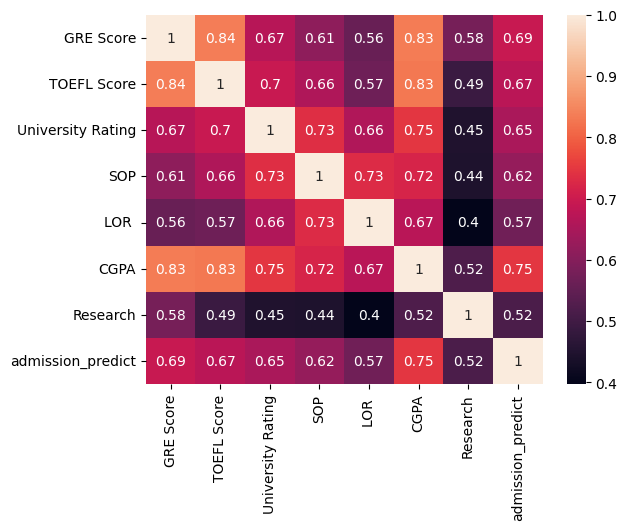

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
x=data.iloc[:,:-1]
y=data['admission_predict']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25,random_state=1)

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'admission_predict'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini')

In [ ]:
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_gini = dt_gini.predict(x_test)

In [ ]:
y_pred_gini

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

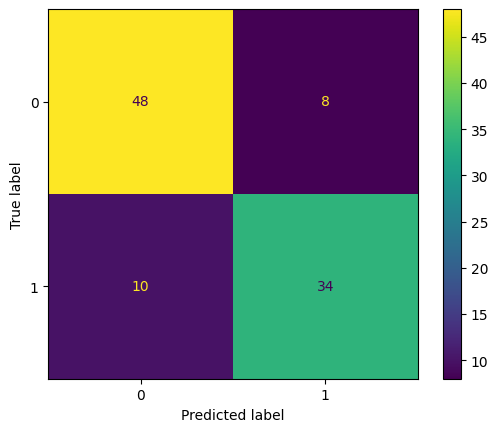

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gini)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
accuracy_score(y_test, y_pred_gini, normalize=False)

82.0

In [ ]:
precision = precision_score(y_test, y_pred_gini)
recall = recall_score(y_test, y_pred_gini)

In [ ]:
precision

0.8095238095238095

In [ ]:
recall

0.7727272727272727

In [ ]:
gini_index=x.iloc[[15]]
gini_index

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
15,314,105,3,3.5,2.5,8.3,0


In [ ]:
gini_index_pred = dt_gini.predict(gini_index)
if (gini_index_pred == 0):
    print("Student cannot be admitted.")
else:
    print("Student can be admitted!!!")

Student cannot be admitted.


In [ ]:
from sklearn.tree import plot_tree

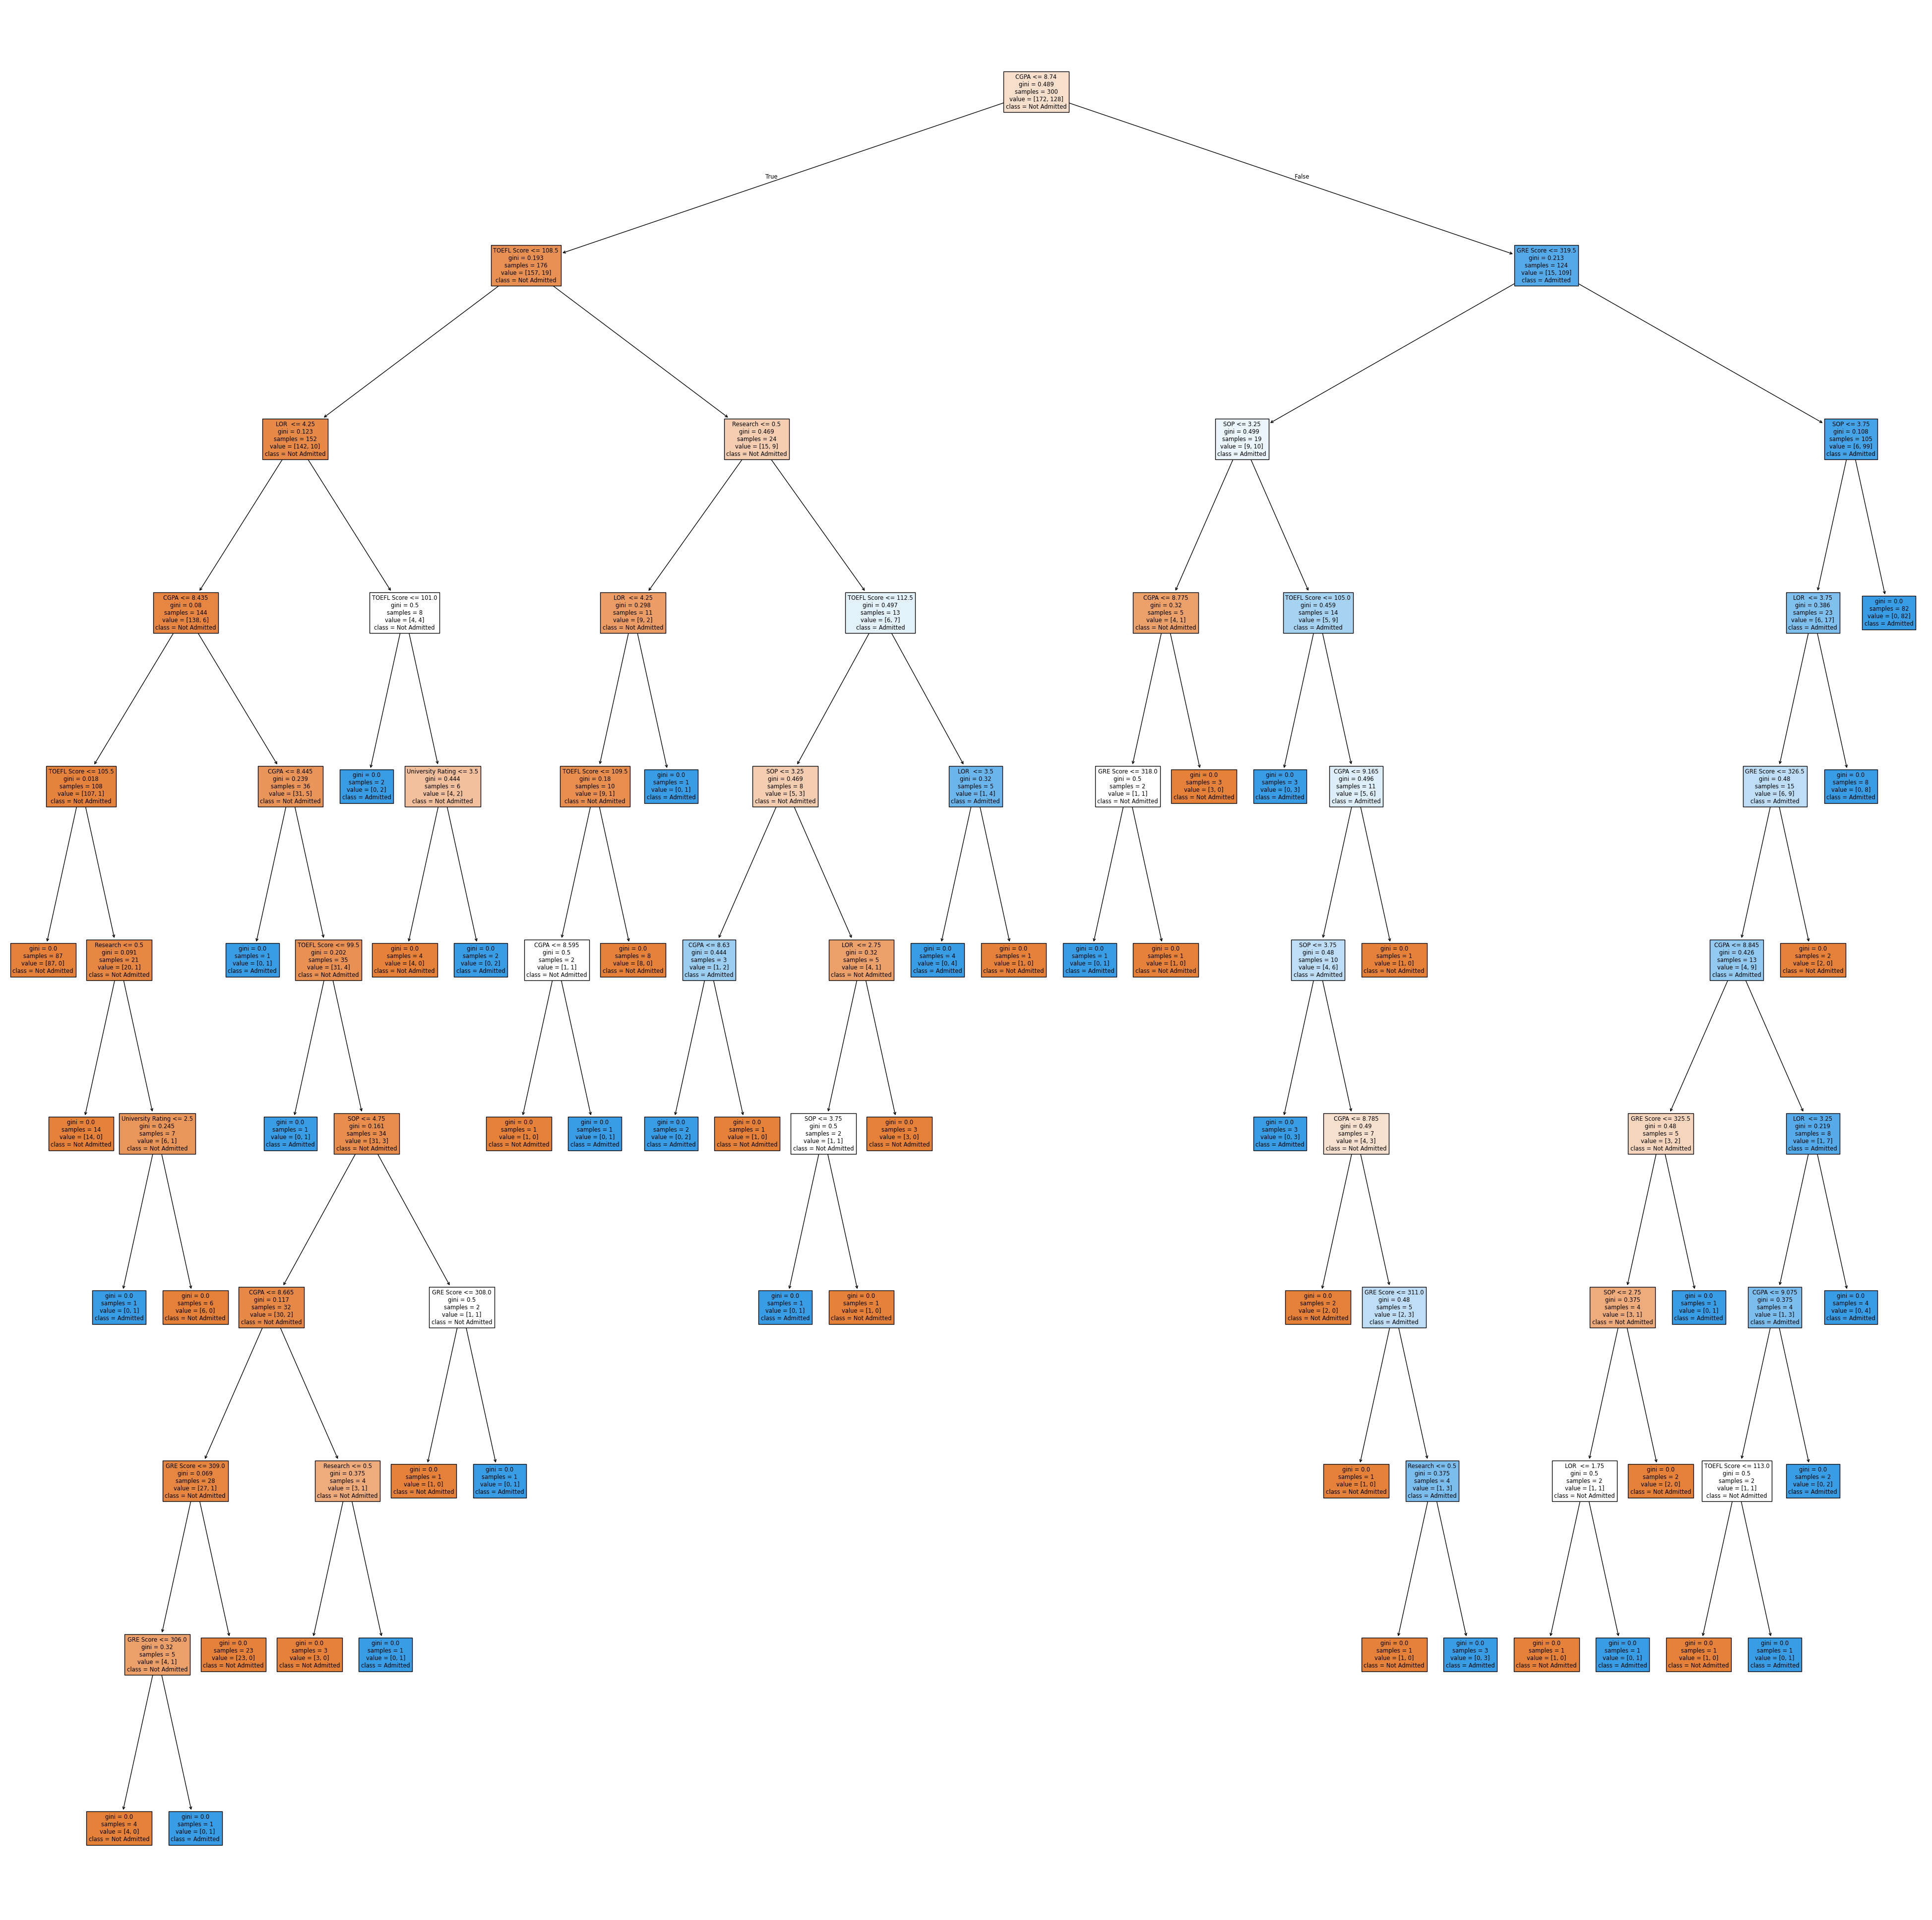

In [ ]:
plt.figure(figsize=(50,50))
plot_tree(dt_gini, feature_names=x.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()